R2 Score: 0.8730234782147749
RMSE: 5.016937350246068


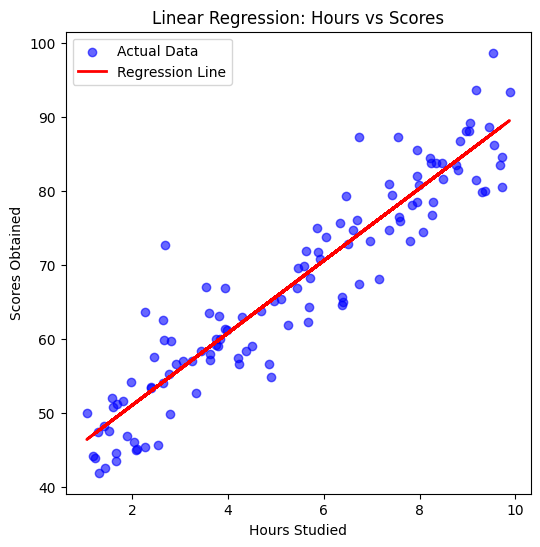

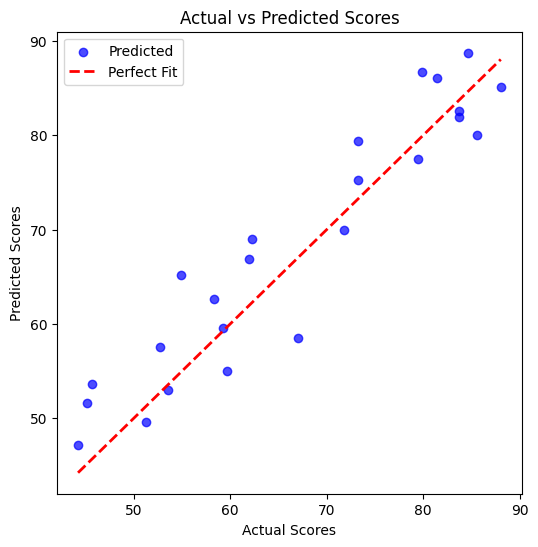

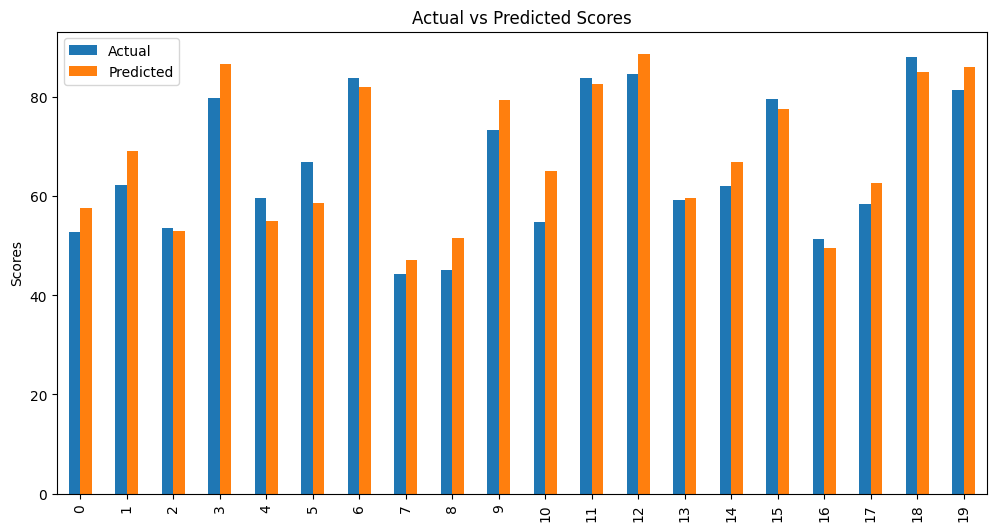

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
file_path = r"score.csv"  
df = pd.read_csv(file_path)

# Features & Target
X = df[["Hours"]]     
y = df["Scores"]    

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# ------------------- VISUALIZATIONS -------------------

# 1. Regression Line
plt.figure(figsize=(6,6))
plt.scatter(X, y, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X, lin_reg.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.title("Linear Regression: Hours vs Scores")
plt.legend()
plt.show()

# 2. Actual vs Predicted Scatter
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.show()

#3. Bar Comparison 
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
comparison = comparison.head(20)

comparison.plot(kind="bar", figsize=(12,6))
plt.title("Actual vs Predicted Scores")
plt.ylabel("Scores")
plt.show()
